In [1]:
import os
os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\Gubbz\Documents\NSS\NSS_Projects\open-secrets-skittles


In [2]:
# from folder.file import function_name
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from data.Skittles_collection import state_code_df, get_all_districts

In [4]:
#state_code_df();
#get_all_districts().to_csv('../open-secrets-skittles/data/States_df.csv', index = False) 

In [5]:
States_df = pd.read_csv('../open-secrets-skittles/data/States_df.csv')

In [6]:
States_df['Party'] = States_df['FirstLastP'].str.split(' ').str[-1]

In [7]:
States_df

,District,State,cid,FirstLastP,Rcpts,Spent,PACs,Indivs,Cand,Other,...,Result,CRPICO,IncCID,Incumbent,primarydate,DistIDCurr,capeye,sort,SmLgIndivsNote,Party
0,1,Alabama,N00044245,Jerry Carl (R),1971321.50,1859348.91,387000.00,1044195.95,434655.50,105470.05,...,W,O,NaN,NaN,2020-03-03 00:00:00 +0000,,0,2,N,(R)
1,1,Alabama,N00044750,James Averhart (D),80094.95,78973.24,0.00,50849.95,29245.00,0.00,...,L,O,NaN,NaN,2020-03-03 00:00:00 +0000,,0,2,N,(D)
2,2,Alabama,N00041295,Barry Moore (R),650806.75,669367.70,230281.65,408536.20,11500.00,488.90,...,W,O,NaN,NaN,2020-03-03 00:00:00 +0000,,0,2,N,(R)
3,2,Alabama,N00045944,Phyllis Harvey-Hall (D),56049.68,55988.07,2032.00,42411.95,10575.41,1030.32,...,L,O,NaN,NaN,2020-03-03 00:00:00 +0000,,0,2,N,(D)
4,2,Alabama,N00045631,John Page (L),0.00,0.00,0.00,0.00,0.00,0.00,...,,O,NaN,NaN,2020-03-03 00:00:00 +0000,NaN,0,2,N,(L)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1,Wyoming,N00035504,Liz Cheney (R),3003883.34,3060166.78,1292490.00,1169995.46,0.00,541397.88,...,W,I,NaN,NaN,2020-08-18 00:00:00 +0000,WY01,0,1,N,(R)
1260,1,Wyoming,N00047272,Lynnette Grey Bull (D),134597.32,132234.75,2800.00,130197.32,0.00,1600.00,...,L,C,NaN,NaN,2020-08-18 00:00:00 +0000,,0,2,N,(D)
1261,1,Wyoming,N00047207,Zoilo Adalia (3),0.00,0.00,0.00,0.00,0.00,0.00,...,,C,NaN,NaN,2020-08-18 00:00:00 +0000,NaN,0,2,N,(3)
1262,1,Wyoming,N00035139,Richard Brubaker (L),0.00,0.00,0.00,0.00,0.00,0.00,...,,C,NaN,NaN,2020-08-18 00:00:00 +0000,NaN,0,2,N,(L)


In [8]:
States_df.columns

Index(['District', 'State', 'cid', 'FirstLastP', 'Rcpts', 'Spent', 'PACs',
       'Indivs', 'Cand', 'Other', 'EndCash', 'LgIndivs', 'SmIndivs', 'enddate',
       'ReleaseDate', 'VotePercent', 'Result', 'CRPICO', 'IncCID', 'Incumbent',
       'primarydate', 'DistIDCurr', 'capeye', 'sort', 'SmLgIndivsNote',
       'Party'],
      dtype='object')

In [73]:
def clean_data(dataframe):
    dataframe = dataframe.drop(
        columns = ['Incumbent','primarydate', 'sort', 'capeye','SmLgIndivsNote','enddate','ReleaseDate','cid', 'Spent']
    )
    dataframe = dataframe.rename(columns = {'Rcpts':'Raised', 'Indivs':'Total_Indiv_Contribution', 'Cand':'Self_Financing', 'CRPICO':'Incumbent Status'})
    return dataframe

e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [76]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

In [78]:
inc_status_vs_cash_df = clean_data(States_df)
inc_status_vs_cash_df

,District,State,FirstLastP,Raised,PACs,Total_Indiv_Contribution,Self_Financing,Other,EndCash,LgIndivs,SmIndivs,VotePercent,Result,Incumbent Status,IncCID,DistIDCurr,Party
0,1,Alabama,Jerry Carl (R),1971321.50,387000.00,1044195.95,434655.50,105470.05,111972.59,999616.34,44579.61,64.88,W,O,NaN,,(R)
1,1,Alabama,James Averhart (D),80094.95,0.00,50849.95,29245.00,0.00,1121.71,37954.77,12895.18,35.04,L,O,NaN,,(D)
2,2,Alabama,Barry Moore (R),650806.75,230281.65,408536.20,11500.00,488.90,-13633.28,346328.65,62207.55,65.30,W,O,NaN,,(R)
3,2,Alabama,Phyllis Harvey-Hall (D),56049.68,2032.00,42411.95,10575.41,1030.32,0.00,27105.15,15306.80,34.61,L,O,NaN,,(D)
4,2,Alabama,John Page (L),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,O,NaN,NaN,(L)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1,Wyoming,Liz Cheney (R),3003883.34,1292490.00,1169995.46,0.00,541397.88,153567.15,980348.72,189646.74,68.60,W,I,NaN,WY01,(R)
1260,1,Wyoming,Lynnette Grey Bull (D),134597.32,2800.00,130197.32,0.00,1600.00,2362.57,65975.00,64222.32,24.60,L,C,NaN,,(D)
1261,1,Wyoming,Zoilo Adalia (3),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,C,NaN,NaN,(3)
1262,1,Wyoming,Richard Brubaker (L),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,,C,NaN,NaN,(L)


In [104]:
sum([1044195.95,434655.50,105470.05,999616.34,44579.61])

2628517.4499999997

In [80]:
s = inc_status_vs_cash_df.columns.tolist()

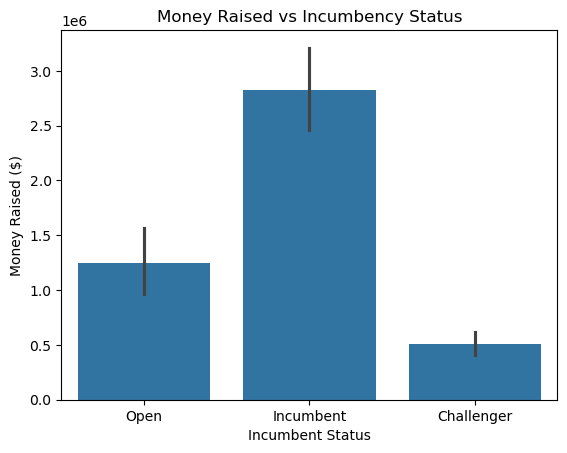

In [82]:
sns.barplot(x='Incumbent Status', y='Raised', data = inc_status_vs_cash_df)

plt.xticks(ticks=['O','I','C'], labels=['Open', 'Incumbent', 'Challenger'])
plt.title('Money Raised vs Incumbency Status')
plt.xlabel('Incumbent Status')
plt.ylabel('Money Raised ($)')
plt.show()

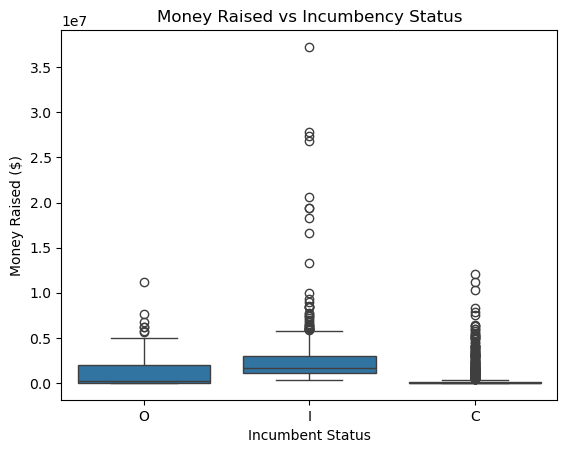

In [84]:
sns.boxplot(y='Raised',x='Incumbent Status', data=inc_status_vs_cash_df)
plt.title('Money Raised vs Incumbency Status')
plt.xlabel('Incumbent Status')
plt.ylabel('Money Raised ($)')
plt.show()

In [ ]:
normalized_df = inc_status_vs_cash_df.div()